# Case Study : Movielens Data Analysis
<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Utiliser Pandas pour lire le dataset<br>
</p>
<br>
dans ce notebook vous allez utiliser les 3 fichiers:
* **ratings.csv :** *userId*,*movieId*,*rating*, *timestamp*
* **tags.csv :** *userId*,*movieId*, *tag*, *timestamp*
* **movies.csv :** *movieId*, *title*, *genres* <br>


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# Loading the data
movies = pd.read_csv('./movielens/movies.csv', sep=',')
tags = pd.read_csv('./movielens/tags.csv', sep=',')
ratings = pd.read_csv('./movielens/ratings.csv', sep=',')

### Identifying null values as well as values labelled as object

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
movieId    27278 non-null int64
title      27278 non-null object
genres     27278 non-null object
dtypes: int64(1), object(2)
memory usage: 639.4+ KB


In [6]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465564 entries, 0 to 465563
Data columns (total 4 columns):
userId       465564 non-null int64
movieId      465564 non-null int64
tag          465548 non-null object
timestamp    465564 non-null int64
dtypes: int64(3), object(1)
memory usage: 14.2+ MB


In [7]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
userId       int64
movieId      int64
rating       float64
timestamp    int64
dtypes: float64(1), int64(3)
memory usage: 610.4 MB


In [8]:
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [9]:
ratings.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

- No null values for ratings and movies

In [10]:
tags.isnull().any()

userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

`!` Null values present in tag column

### Exploratory Analysis

#### Movies

Let's explore these tables before dropping these values

In [11]:
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [12]:
movies.tail(10)

,movieId,title,genres
27268,131241,Ants in the Pants (2000),Comedy|Romance
27269,131243,Werner - Gekotzt wird später (2003),Animation|Comedy
27270,131248,Brother Bear 2 (2006),Adventure|Animation|Children|Comedy|Fantasy
27271,131250,No More School (2000),Comedy
27272,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)
27277,131262,Innocence (2014),Adventure|Fantasy|Horror


In [13]:
movies.shape

(27278, 3)

In [14]:
movies['title']

0                                         Toy Story (1995)
1                                           Jumanji (1995)
2                                  Grumpier Old Men (1995)
3                                 Waiting to Exhale (1995)
4                       Father of the Bride Part II (1995)
5                                              Heat (1995)
6                                           Sabrina (1995)
7                                      Tom and Huck (1995)
8                                      Sudden Death (1995)
9                                         GoldenEye (1995)
10                          American President, The (1995)
11                      Dracula: Dead and Loving It (1995)
12                                            Balto (1995)
13                                            Nixon (1995)
14                                 Cutthroat Island (1995)
15                                           Casino (1995)
16                            Sense and Sensibility (199

In [15]:
movies.iloc[27272]

movieId                                               131252
title      Forklift Driver Klaus: The First Day on the Jo...
genres                                         Comedy|Horror
Name: 27272, dtype: object

#### Tags

In [16]:
tags.head(10)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078
5,65,668,bollywood,1368149876
6,65,898,screwball comedy,1368150160
7,65,1248,noir thriller,1368149983
8,65,1391,mars,1368150055
9,65,1617,neo-noir,1368150217


In [17]:
tags.tail(10)

,userId,movieId,tag,timestamp
465554,138446,3489,visually appealing,1358983822
465555,138446,7045,family friendly,1358983660
465556,138446,7045,Scary Movies To See on Halloween,1358983660
465557,138446,7164,Peter Pan,1358983855
465558,138446,7164,visually appealing,1358983855
465559,138446,55999,dragged,1358983772
465560,138446,55999,Jason Bateman,1358983778
465561,138446,55999,quirky,1358983778
465562,138446,55999,sad,1358983772
465563,138472,923,rise to power,1194037967


In [18]:
tags.shape

(465564, 4)

In [19]:
tags.iloc[int(465564/2)]

userId                70201
movieId                4468
tag          Martin Donovan
timestamp        1302800165
Name: 232782, dtype: object

#### Ratings

In [20]:
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
5,1,112,3.5,1094785740
6,1,151,4.0,1094785734
7,1,223,4.0,1112485573
8,1,253,4.0,1112484940
9,1,260,4.0,1112484826


In [21]:
ratings.tail(10)

,userId,movieId,rating,timestamp
20000253,138493,60816,4.5,1259865163
20000254,138493,61160,4.0,1258390537
20000255,138493,65682,4.5,1255816373
20000256,138493,66762,4.5,1255805408
20000257,138493,68319,4.5,1260209720
20000258,138493,68954,4.5,1258126920
20000259,138493,69526,4.5,1259865108
20000260,138493,69644,3.0,1260209457
20000261,138493,70286,5.0,1258126944
20000262,138493,71619,2.5,1255811136


In [22]:
ratings.shape

(20000263, 4)

In [23]:
ratings.iloc[int(20000263/2)]

userId           69141.0
movieId           1357.0
rating               5.0
timestamp    914691116.0
Name: 10000131, dtype: float64

#### Dropping NAN values

In [24]:
tags = tags.dropna()

In [25]:
#Let's check
tags.isnull().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

## Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020B80032400>]],
      dtype=object)

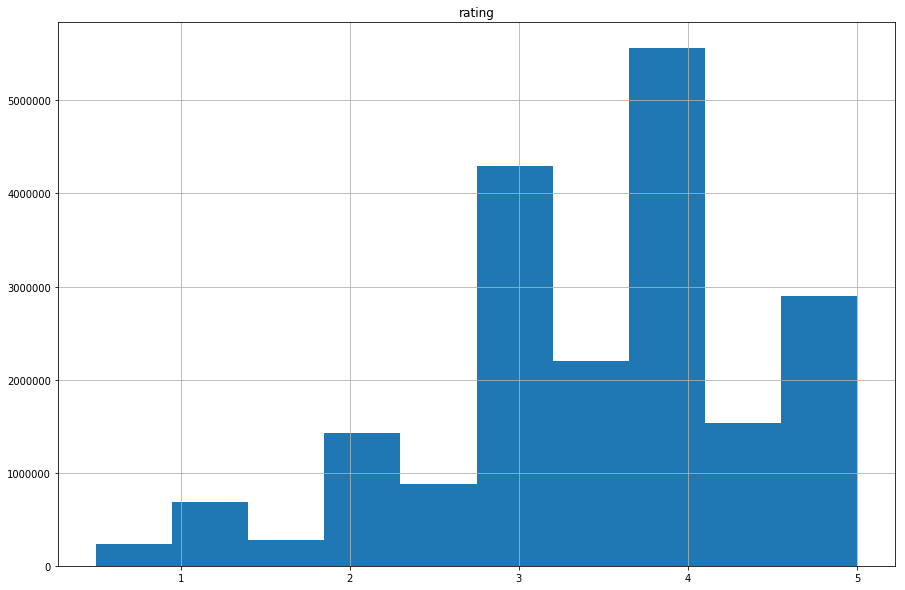

In [26]:
ratings.hist(column='rating', figsize=(15,10))

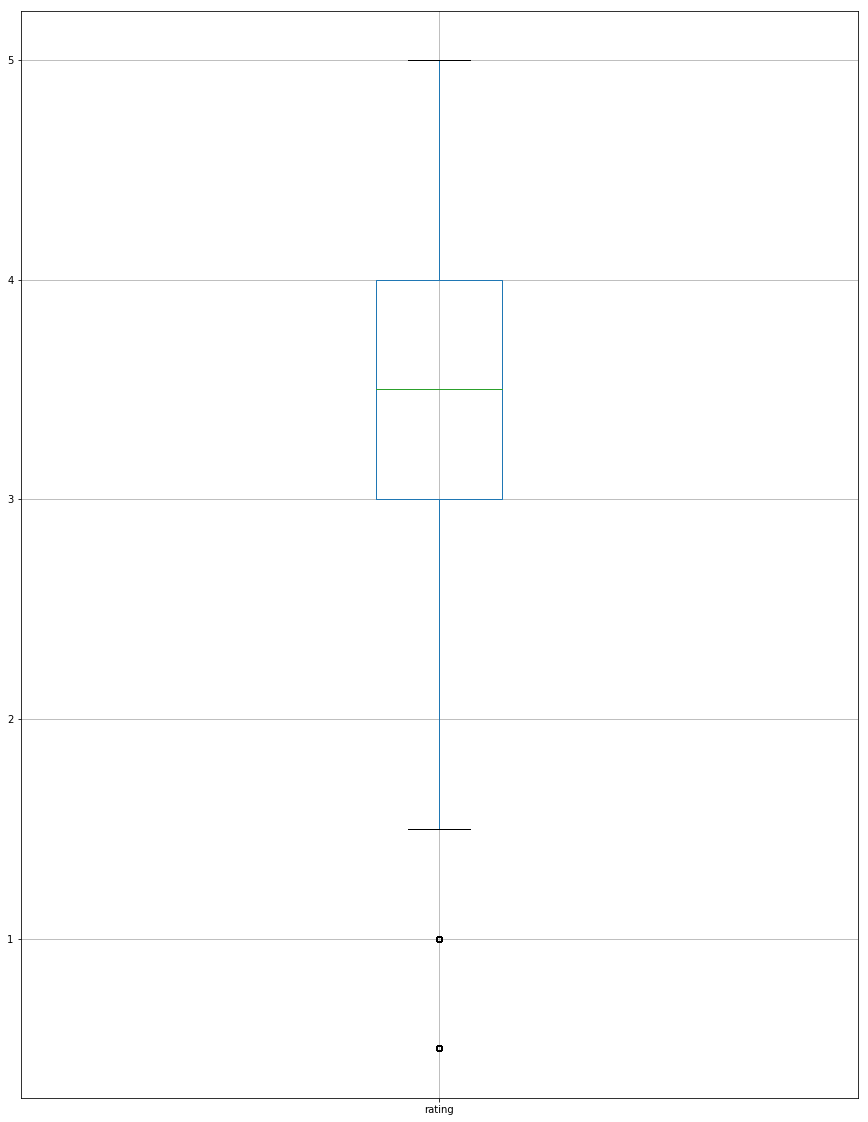

In [27]:
ratings.boxplot(column='rating', figsize=(15,20))

It looks like we have a couple of outliers here at the bottom of the box plot.

In [28]:
tags['tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [29]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [30]:
tag_counts = tags['tag'].value_counts()
tag_counts[-10:]

I came out loving it                                       1
Maggie First real word!!! she say it after all titles!!    1
comedy drama adventure                                     1
ewan macgregor                                             1
when watched in your teens.                                1
best movie                                                 1
tankjacking                                                1
Chaotic Neutral Character                                  1
Oxide Pang Chun                                            1
jennifer schwalbach smith                                  1
Name: tag, dtype: int64

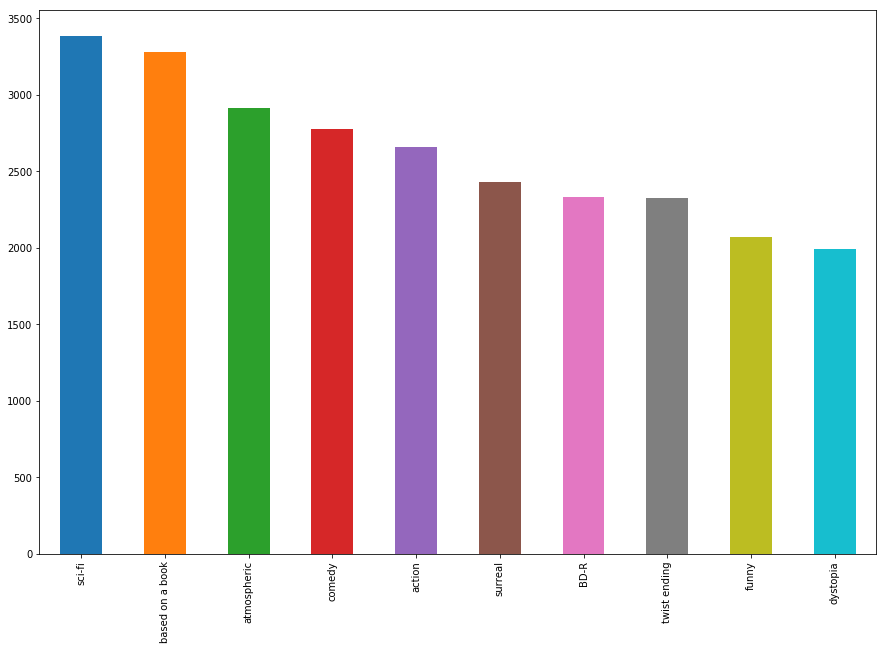

In [31]:
tag_counts[:10].plot(kind='bar', figsize=(15,10))

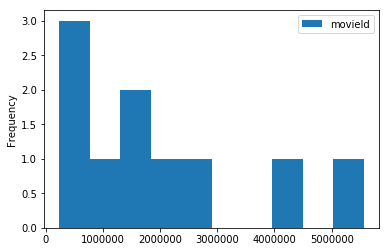

In [32]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count.plot(kind='hist')

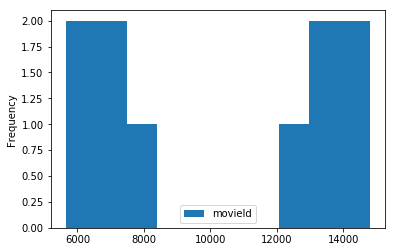

In [35]:
average_rating = ratings[['movieId','rating']].groupby('rating').mean()
average_rating.plot(kind='hist')

In [36]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.head()

,rating
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161


In [37]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.tail()

,rating
movieId,
131254,1
131256,1
131258,1
131260,1
131262,1


In [40]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [41]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [42]:
t = movies.merge(tags, on='movieId', how='inner')
t.head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched,1417736680
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation,1183903155
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature,1183933307
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation,1183934770
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie,1245093573


It seems like there is some cleaning needed

In [43]:
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

,movieId,rating,timestamp
0,1,3.921240,1.052654e+09
1,2,3.211977,1.037616e+09
2,3,3.151040,9.596480e+08
3,4,2.861393,9.242144e+08
4,5,3.064592,9.620161e+08


In [44]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.tail()

,movieId,title,genres,rating,timestamp
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0,1.427744e+09
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0,1.427745e+09
26741,131258,The Pirates (2014),Adventure,2.5,1.427745e+09
26742,131260,Rentun Ruusu (2001),(no genres listed),3.0,1.427745e+09
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0,1.427748e+09


In [45]:
is_highly_rated = box_office['rating'] >= 4.0

box_office[is_highly_rated][-5:]

,movieId,title,genres,rating,timestamp
26737,131250,No More School (2000),Comedy,4.0,1.427743e+09
26738,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,4.0,1.427743e+09
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0,1.427744e+09
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0,1.427745e+09
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0,1.427748e+09


In [46]:
is_comedy = box_office['genres'].str.contains('Comedy')

box_office[is_comedy][:5]

,movieId,title,genres,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240,1.052654e+09
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040,9.596480e+08
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393,9.242144e+08
4,5,Father of the Bride Part II (1995),Comedy,3.064592,9.620161e+08
6,7,Sabrina (1995),Comedy|Romance,3.366484,9.492579e+08


In [47]:
box_office[is_comedy & is_highly_rated][-5:]

,movieId,title,genres,rating,timestamp
26736,131248,Brother Bear 2 (2006),Adventure|Animation|Children|Comedy|Fantasy,4.0,1.427742e+09
26737,131250,No More School (2000),Comedy,4.0,1.427743e+09
26738,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,4.0,1.427743e+09
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0,1.427744e+09
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0,1.427745e+09


In [48]:
movie_genres = movies['genres'].str.split('|', expand=True)
print(type(movie_genres))

<class 'pandas.core.frame.DataFrame'>


In [49]:
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
5,Action,Crime,Thriller,None,None,None,None,None,None,None
6,Comedy,Romance,None,None,None,None,None,None,None,None
7,Adventure,Children,None,None,None,None,None,None,None,None
8,Action,None,None,None,None,None,None,None,None,None
9,Action,Adventure,Thriller,None,None,None,None,None,None,None


In [50]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

In [51]:
movies.tail()

,movieId,title,genres,year
27273,131254,Kein Bund für's Leben (2007),Comedy,2007
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002
27275,131258,The Pirates (2014),Adventure,2014
27276,131260,Rentun Ruusu (2001),(no genres listed),2001
27277,131262,Innocence (2014),Adventure|Fantasy|Horror,2014


In [55]:
tags = pd.read_csv('./movielens/tags.csv', sep=',')

In [56]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')

In [57]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465564 entries, 0 to 465563
Data columns (total 5 columns):
userId         465564 non-null int64
movieId        465564 non-null int64
tag            465548 non-null object
timestamp      465564 non-null int64
parsed_time    465564 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 17.8+ MB


In [58]:
tags.head(2)

,userId,movieId,tag,timestamp,parsed_time
0,18,4141,Mark Waters,1240597180,2009-04-24 18:19:40
1,65,208,dark hero,1368150078,2013-05-10 01:41:18


In [59]:
greater_than_t = tags['parsed_time'] > '2015-02-01'

selected_rows = tags[greater_than_t]

tags.shape, selected_rows.shape

((465564, 5), (12130, 5))

In [60]:
tags.sort_values(by='parsed_time', ascending=True)[:10]

,userId,movieId,tag,timestamp,parsed_time
333932,100371,2788,monty python,1135429210,2005-12-24 13:00:10
333927,100371,1732,coen brothers,1135429236,2005-12-24 13:00:36
333924,100371,1206,stanley kubrick,1135429248,2005-12-24 13:00:48
333923,100371,1193,jack nicholson,1135429371,2005-12-24 13:02:51
333939,100371,5004,peter sellers,1135429399,2005-12-24 13:03:19
333922,100371,47,morgan freeman,1135429412,2005-12-24 13:03:32
333921,100371,47,brad pitt,1135429412,2005-12-24 13:03:32
333936,100371,4011,brad pitt,1135429431,2005-12-24 13:03:51
333937,100371,4011,guy ritchie,1135429431,2005-12-24 13:03:51
333920,100371,32,bruce willis,1135429442,2005-12-24 13:04:02


## La moyenne des ratings

### Ratings VS Time of appearance

Est ce que les ratings sont liés à la date de sortie d'un film?

In [62]:
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.tail()

,movieId,rating
26739,131254,4.0
26740,131256,4.0
26741,131258,2.5
26742,131260,3.0
26743,131262,4.0


In [66]:
joined = movies.merge(average_rating, on='movieId', how='inner')
joined.corr()

,movieId,rating
movieId,1.000000,-0.090369
rating,-0.090369,1.000000


D'apres le coefficient de correlation on dirait qu'il n'y a aucune relation entre rating et date de sortie d'un film.

In [67]:
joined.head(50)

,movieId,title,genres,year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.861393
4,5,Father of the Bride Part II (1995),Comedy,1995,3.064592
5,6,Heat (1995),Action|Crime|Thriller,1995,3.834930
6,7,Sabrina (1995),Comedy|Romance,1995,3.366484
7,8,Tom and Huck (1995),Adventure|Children,1995,3.142049
8,9,Sudden Death (1995),Action,1995,3.004924
9,10,GoldenEye (1995),Action|Adventure|Thriller,1995,3.430029


In [69]:
yearly_average = joined[['year','rating']].groupby('year', as_index=False).mean()
yearly_average[:10]

,year,rating
0,1891,3.000000
1,1893,3.375000
2,1894,3.071429
3,1895,3.125000
4,1896,3.183036
5,1898,3.850000
6,1899,3.625000
7,1900,3.166667
8,1901,5.000000
9,1902,3.738189


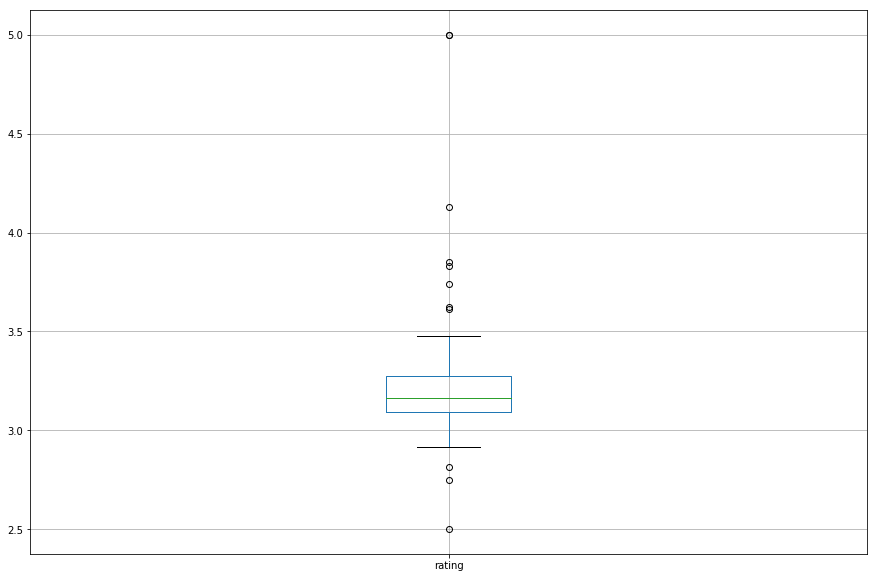

In [75]:
yearly_average.plot(kind='box',x='year', y='rating', figsize=(15,10), grid=True)

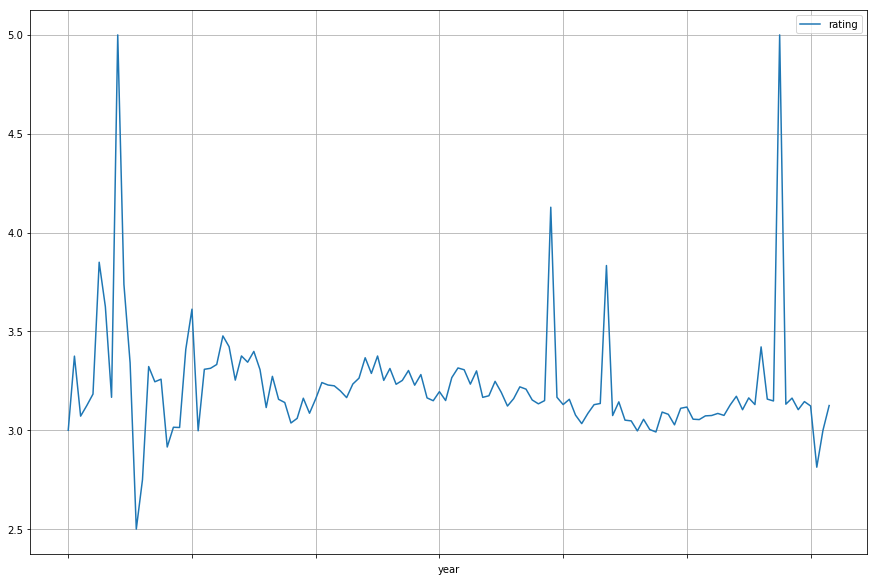

In [76]:
yearly_average.plot(x='year', y='rating', figsize=(15,10), grid=True)

Est ce qu'il y a des points qui sont des valeurs extrêmes? outliers 
- D'apres le `boxplot` on dirait que oui nous avons des outliers
- D'apres le dernier graphe nous avons 2 outliers qui paraissent un peu louche l'un vers le debut et l'autre vers la fin.

In [ ]:
yearly_average['year']

In [80]:
yearly_average[yearly_average['rating']==5]

,year,rating
8,1901,5.0
115,2009–,5.0


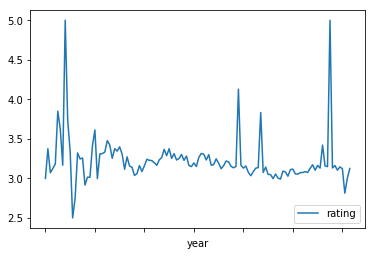

In [79]:
yearly_average.plot(x='year', y='rating')

- On dirait que nous avons un probleme avec l'annee 2009_ et on doit voir pourquoi le film 1901 a une note de 5 (je veux dire est il un si bon film?).

In [90]:
yearly_average[yearly_average['year'] == 2009]

,year,rating


In [84]:
yearly_average.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 0 to 123
Data columns (total 2 columns):
year      124 non-null object
rating    124 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.9+ KB


In [95]:
yearly_average['year'] = pd.to_numeric(yearly_average['year'],errors='coerce')

In [98]:
yearly_average = yearly_average.dropna()

In [99]:
yearly_average.isnull().any()

year      False
rating    False
dtype: bool

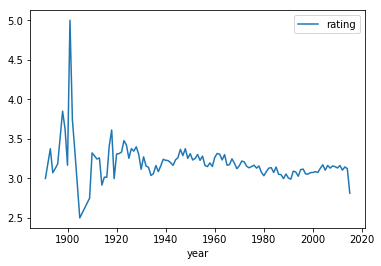

In [100]:
yearly_average.plot(x='year', y='rating')

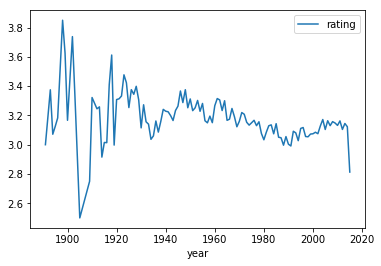

In [108]:
yearly_average[yearly_average['year'] != 1901].plot(x='year', y='rating')

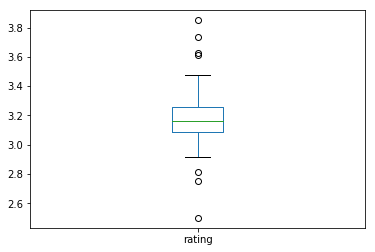

In [109]:
yearly_average[yearly_average['year'] != 1901].plot(kind='box', x='year', y='rating')

Maintenant ceci parait plus logique meme si nous avons tout de meme d'autres outliers.